In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
print(ad.__version__)

0.7.8


In [2]:
# results_file = '../data/processed/sc_write/'

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.figdir = '../figures/Fig1/'
sc.settings.set_figure_params(dpi=80, dpi_save=300, format="eps", frameon=False)  # low dpi (dots per inch) yields small inline figures

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [4]:
adata = sc.read_h5ad("../data/processed/cells_postprocessed.h5ad")
adata

AnnData object with n_obs × n_vars = 5903 × 31379
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'library', 'sizeFactor', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'subsets_Ribo_sum', 'subsets_Ribo_detected', 'subsets_Ribo_percent', 'total', 'low_lib_size', 'low_n_features', 'high_subsets_Mito_percent', 'high_subsets_Ribo_percent', 'discard', 'codename', 'treat', 'dose', 'duration', 'mouse', 'serum_term', 'description', 'treat_dose_duration', 'stim', 'cell_type_cellassign', 'integrated_snn_res.0.8', 'seurat_clusters', 'RNA_snn_res.0.8', 'cell_type_refined', 'cell_type_brief', 'cell_id', 'UMAP_1', 'UMAP_2', 'UMAPint_1', 'UMAPint_2'

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw=adata

normalizing counts per cell
    finished (0:00:00)


In [6]:
marker_genes = ["Gh","Ghrhr",       ## Som
                "Prl","Angpt1",     ## Lac
                "Pomc","Tbx19",     ## Cort
                "Pax7",             ## Mel
                "Cga","Fshb","Lhb", ## Gonad
                "Tshb","Trhr",      ## Thyro
                "Pbk","Mki67",      ## Pou1f1
                "Sox2","Cyp2f2",    ## Stem
                "C1qb",             ## WBCs
                "Hbb-bt",           ## RBCs
                "Pecam1","Emcn",    ## Endo
                "Col1a1","Ogn",     ## Peri
                "Col25a1","Scn7a"   ## Pitui
               ]
order = ["Som","Lac","Cort","Mel","Gonad","Thyro","Pou1f1","Stem","WBCs","RBCs","Endo","Peri","Pitui",
         "Ambig"]
vln_palette = ["#F8766D","#F8766D",  ## Som
               "#E18A00","#E18A00",  ## Lac
               "#00ACFC","#00ACFC",  ## Cort
               "#00BE70",            ## Mel
               "#8B93FF","#8B93FF","#8B93FF",  ## Gonad
               "#FF65AC","#FF65AC",  ## Thyro
               "#BE9C00","#BE9C00",  ## Pou1f1
               "#8CAB00","#8CAB00",  ## Stem
               "#24B700",  ## WBCs
               "#00C1AB",  ## RBCs
               "#00BBDA","#00BBDA",  ## Endo
               "#00ACFC","#00ACFC",  ## Peri
               "#D575FE","#D575FE"  ## Pitui
              ]
adata.obs['cell_type_brief'] = adata.obs['cell_type_brief'].astype('category').cat.reorder_categories(order)

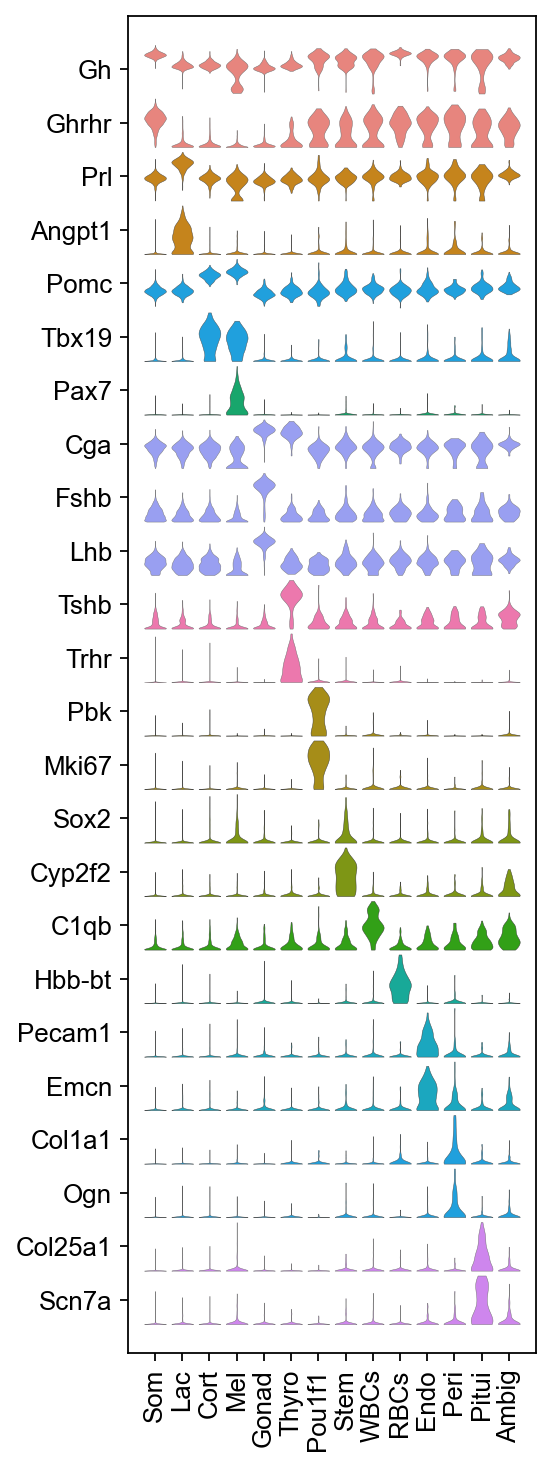

In [7]:
sc.pl.stacked_violin(
    adata, 
    var_names=marker_genes, 
    groupby="cell_type_brief", 
    rotation=90, 
    yticklabels=False,
    swap_axes=True, 
    dendrogram=False, 
    order=order, 
    row_palette=vln_palette, 
    figsize=(5,11), 
    save="vertical",
    use_raw = False
)